In [182]:
import pandas as pd
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [183]:
s = 'mother loves the father children love playing football father loves playing football too and he loves mother'

In [184]:
stopwords = set(['', 'y', 'my', 'ourselves', "wouldn't", 'all', "didn't", 'a', 'yourselves', 'why', "hasn't", 'being', 'have', 'that', 'such', 'wasn', 'themselves', "haven't", 'its', 'was', 'this', 'i', 'only', "you're", 'won', 'into', 'o', 'then', 'off', 'her', 'out', 'were', 'if', 'after', 'further', 'it', 'she', 'and', 'through', 'here', 'few', 'other', 'are', 'than', 'shouldn', "won't", "you'll", "you'd", 'you', 'your', "hadn't", 'myself', 'the', 'is', 'me', 'while', "aren't", 'can', 'our', 'below', 'doesn', 'mightn', 'shan', 'of', 'not', 'd', "mightn't", 'ours', 'should', "she's", 'himself', 'just', 'couldn', 'who', 'hasn', 'some', 'or', 'more', 'having', "couldn't", 'those', 'where', 'an', 'do', 'at', 'by', 'been', 'has', 'haven', 'until', 'mustn', 'too', 'ain', 'herself', 're', 'because', 'any', 'am', 'theirs', 'yours', 'their', 'what', 'most', 'under', 'how', 'we', 'same', 'weren', 'nor', 'didn', 'for', 'during', 'when', "wasn't", 'above', 'him', 't', "don't", 'ma', "mustn't", 'both', 'them', 'had', 'so', 'does', "doesn't", 'against', 'very', "shouldn't", 'in', 'there', 'each', "that'll", 'don', "should've", 'which', 'now', 'they', 's', 'on', 'but', 'hadn', 'm', 'his', 'he', 'did', 'up', 'before', 'own', 'wouldn', 'yourself', 'be', 'doing', 've', 'over', "shan't", "weren't", "needn't", 'whom', 'to', 'again', 'll', 'aren', 'from', 'itself', 'between', 'down', "you've", 'needn', 'these', 'once', 'will', 'with', 'no', 'about', 'isn', 'as', 'hers', "isn't", "it's"])

In [185]:
batch_size = 10
embedding_size = 60
words = s.split()
for word in words:
    if word in stopwords:
        words.remove(word)

In [187]:
words

['mother',
 'loves',
 'father',
 'children',
 'love',
 'playing',
 'football',
 'father',
 'loves',
 'playing',
 'football',
 'and',
 'loves',
 'mother']

In [186]:
word_list = list(set(s.split()))
word_dict = {w: i for i, w in enumerate(word_list)}
voc_size = len(word_list)

In [169]:
skip_grams = []
for i in range(2, len(words) - 2):
    target = word_dict[words[i]]
    context = [word_dict[words[i - 2]], word_dict[words[i - 1]], word_dict[words[i + 1]], word_dict[words[i + 2]]]
    for word in context:
        skip_grams.append([target, word])
         


In [170]:
def random_batch():
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(skip_grams)), batch_size, replace=False)

    for i in random_index:
        random_inputs.append(np.eye(voc_size)[skip_grams[i][0]])  
        random_labels.append(skip_grams[i][1])  

    return random_inputs, random_labels

In [171]:
class Word2Vec(nn.Module):
        def __init__(self):
            super(Word2Vec, self).__init__()
            self.W = nn.Linear(voc_size, embedding_size, bias=False)
            self.WT = nn.Linear(embedding_size, voc_size, bias=False)
        
        def forward(self, X):
            hidden_layer = self.W(X)
            output_layer = nn.functional.log_softmax(self.WT(hidden_layer), dim=0)
            return output_layer

In [172]:
model = Word2Vec()   
optimizer = optim.Adagrad(model.parameters(), lr=0.01)

In [178]:
for epoch in range(100):
    input_batch, target_batch = random_batch()
    input_batch = torch.Tensor(np.array(input_batch))
    target_batch = torch.LongTensor(np.array(target_batch))
    
    optimizer.zero_grad()
    output = model(input_batch)
    
    loss = nn.functional.nll_loss(output, target_batch)
    loss.backward()
    optimizer.step()

In [181]:
W, WT = model.parameters()
res = {}
for i, label in enumerate(word_list):
    res[label] = W[:, i].detach().numpy()
    #res[label] = WT[i].detach().numpy()

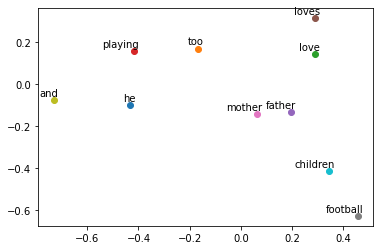

In [180]:
for i, label in enumerate(word_list):
    x, y = W[0][i].item(), W[1][i].item()
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
plt.show()